<a href="https://colab.research.google.com/github/varun-beep/DeepLearning/blob/main/Image_Classification_using_ResNet(6).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
# Step 1: Load CIFAR-10 dataset with preprocessing
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),  # Data Augmentation
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalization
])

batch_size = 64
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)

testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

100%|██████████| 170M/170M [00:18<00:00, 8.98MB/s]


In [4]:
# Step 2: Load a Pretrained ResNet Model and Modify it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=True)  # Use ResNet-18
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)  # Modify the last layer for CIFAR-10 (10 classes)
model = model.to(device)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 194MB/s]


In [5]:
# Step 3: Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the Model
epochs = 5
train_losses = []  # Store training loss for visualization
accuracy_per_epoch = []  # Store accuracy per epoch

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}')

Epoch 1, Loss: 0.9649
Epoch 2, Loss: 0.6775
Epoch 3, Loss: 0.5757
Epoch 4, Loss: 0.5093
Epoch 5, Loss: 0.4453


Epoch 1, Loss: 0.4036
Validation Accuracy after Epoch 1: 83.17%
Epoch 2, Loss: 0.3570
Validation Accuracy after Epoch 2: 81.95%
Epoch 3, Loss: 0.3117
Validation Accuracy after Epoch 3: 81.91%
Epoch 4, Loss: 0.2878
Validation Accuracy after Epoch 4: 81.13%
Epoch 5, Loss: 0.2478
Validation Accuracy after Epoch 5: 82.30%
Epochs: 5, Accuracy recorded: 5


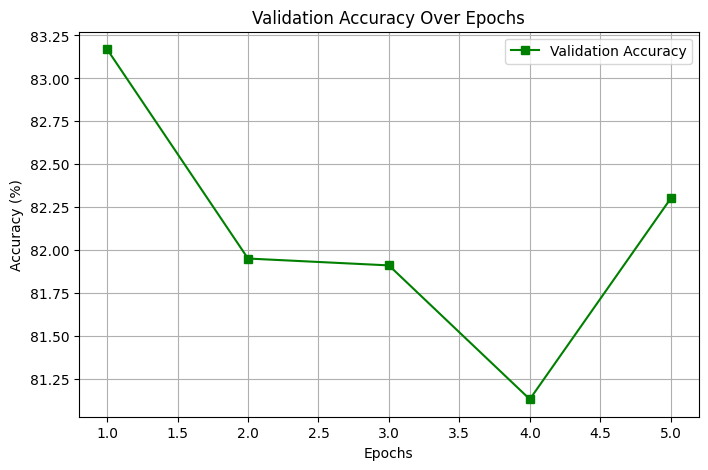

In [12]:
accuracy_per_epoch = []  # Make sure list is properly initialized

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    for images, labels in trainloader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    epoch_loss = running_loss / len(trainloader)
    train_losses.append(epoch_loss)
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}')

    # Step 4: Evaluate Model Performance per epoch
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    epoch_accuracy = 100 * correct / total
    accuracy_per_epoch.append(epoch_accuracy)  # Ensure it's updated per epoch
    print(f'Validation Accuracy after Epoch {epoch+1}: {epoch_accuracy:.2f}%')

# Check if accuracy_per_epoch has correct values
print(f"Epochs: {epochs}, Accuracy recorded: {len(accuracy_per_epoch)}")

# Now plot, making sure accuracy_per_epoch has `epochs` elements
if len(accuracy_per_epoch) == epochs:
    plt.figure(figsize=(8, 5))
    plt.plot(range(1, epochs + 1), accuracy_per_epoch, marker='s', linestyle='-', color='g', label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.title('Validation Accuracy Over Epochs')
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("Mismatch in recorded accuracy values. Check training loop.")

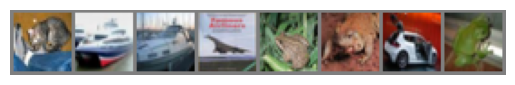

Predicted:  cat ship automobile airplane frog frog automobile cat
Actual:     cat ship ship airplane frog frog automobile frog


In [13]:
model.eval()  # Set to evaluation mode

# Define imshow function
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Convert to correct format
    plt.axis("off")  # Hide axes for better visualization
    plt.show()

# Get some test images
testiter = iter(testloader)
images, labels = next(testiter)
images, labels = images.to(device), labels.to(device)

# Get model predictions
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Display images with predicted and actual labels
imshow(torchvision.utils.make_grid(images[:8].cpu()))  # Show first 8 images
print("Predicted: ", ' '.join(f'{trainset.classes[predicted[j]]}' for j in range(8)))
print("Actual:    ", ' '.join(f'{trainset.classes[labels[j]]}' for j in range(8)))